# Problem Statement- Create a multiple linear regression model for the prediction of car prices

# Step 1: Reading  the Data

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [114]:
# Import file
CarPrice = pd.read_csv('CarPrice_Assignment.csv')
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [115]:
CarPrice.shape

(205, 26)

In [116]:
# Is there a missing values
# 1
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [117]:
# Is there any missing values
# 2
CarPrice.isnull().values.any()

False

There is no missing values in CarPrice Dataframe. So no data cleaning is required

In [118]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2: Understanding the Data and chossing right variables

In [119]:
# Split CarName to get company name, drop CarName and replace it with new found CompanyName
CompanyName = CarPrice['CarName'].apply(lambda x : x.split(' ')[0])
CarPrice.insert(3,"CompanyName",CompanyName)
CarPrice.drop(['CarName'],axis=1,inplace=True)
CarPrice.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [120]:
# Drop Car ID as it does not contribute to model
CarPrice.drop(['car_ID'],axis=1,inplace=True)
CarPrice.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [121]:
#get all unique Company Names from newly added CompanyName column in the CarPrice data frame
CarPrice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As can be noticed there are duplicates like mazda and maxda, Nissan and nissan. We need make the CompanyName unique replacing duplicates and correcting spelling mistakes

In [122]:
# Fix the duplicates and spelling mistakes

# Convert to lowercase first
CarPrice.CompanyName = CarPrice.CompanyName.str.lower()

# Replace

CarPrice.CompanyName.replace('maxda','mazda', inplace=True)
CarPrice.CompanyName.replace('porcshce','porsche', inplace=True)
CarPrice.CompanyName.replace('toyouta','toyota', inplace=True)
CarPrice.CompanyName.replace('vokswagen','volkswagen', inplace=True)
CarPrice.CompanyName.replace('vw','volkswagen', inplace=True)
CarPrice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Understanding Car Price distribution

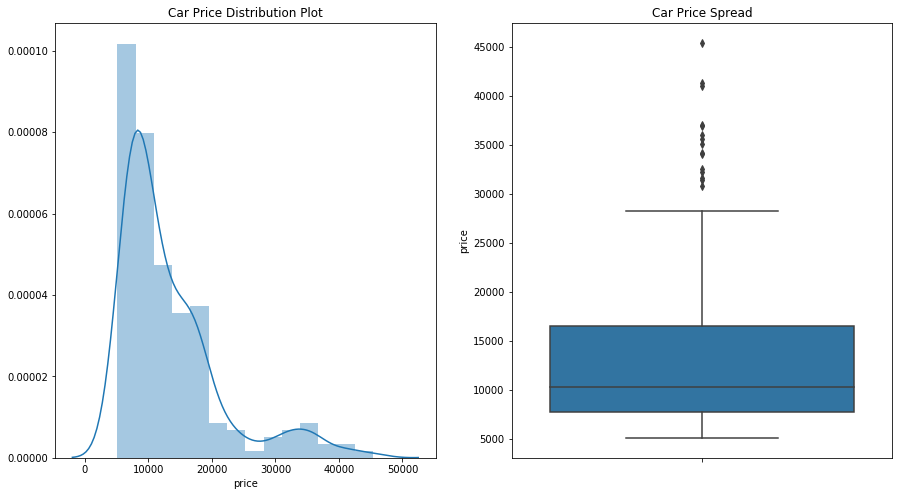

In [123]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(CarPrice.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=CarPrice.price)

plt.show()

In [124]:
print(CarPrice.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Inferences on Car Price-

- Difference between mean and median. The data is right skewed
- 75% of the cars have price less than 16503

To further analyzing the carprice data frame, we can create two new variables:
- Price Range: Lets make four ranges low, budget, high and luxury.
- Risk: Lets make three ranges low, medium and high.

In [125]:
# Add pricesegment column into the data frame
def pricesegfunction(row):
    if(5000.0<= row['price']<10000.0):
        val = 'low'
    elif(10000.0 <= row['price']<20000.0):
        val = 'budget'
    elif(20000.0<=row["price"]<30000.0):
        val = 'high'
    elif(row['price']>=30000.0):
        val = 'luxury'
    return val

for index, row in CarPrice.iterrows():
    CarPrice['priceseg'] = CarPrice.apply(pricesegfunction, axis=1)
    

In [126]:
CarPrice.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,priceseg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,budget
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,budget
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,budget
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,budget
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,budget


In [127]:
CarPrice['priceseg'].isnull().values.any()

False

In [128]:
#add risk column into the data frame as well

ret = ''

def riskfunction(_iterrow):
    global ret
    if(_iterrow['symboling']==3 or _iterrow['symboling']==2):
        ret = 'HighRisk'
    elif(_iterrow['symboling']==0 or _iterrow['symboling']==1):
        ret = 'MediumRisk'
    elif(_iterrow['symboling']==-2 or _iterrow['symboling']==-1):
        ret = 'LowRisk'
    return ret
for index, _iterrow in CarPrice.iterrows():
    CarPrice['riskrate'] = CarPrice.apply(riskfunction, axis=1)

In [129]:
CarPrice.head(30)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,priceseg,riskrate
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.00,111,5000,21,27,13495.000,budget,HighRisk
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.00,111,5000,21,27,16500.000,budget,HighRisk
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.00,154,5000,19,26,16500.000,budget,MediumRisk
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.00,102,5500,24,30,13950.000,budget,HighRisk
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.00,115,5500,18,22,17450.000,budget,HighRisk
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.50,110,5500,19,25,15250.000,budget,HighRisk
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.50,110,5500,19,25,17710.000,budget,MediumRisk
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.50,110,5500,19,25,18920.000,budget,MediumRisk
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.30,140,5500,17,20,23875.000,high,MediumRisk
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.00,160,5500,16,22,17859.167,budget,MediumRisk


In [130]:
CarPrice['riskrate'].isnull().values.any()

False

In [131]:
CarPrice.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'priceseg',
       'riskrate'],
      dtype='object')

### Univariate analysis

### 1. On Categorical Variables

#### ###Analyzing columns priceseg, companyname and fueltype columns

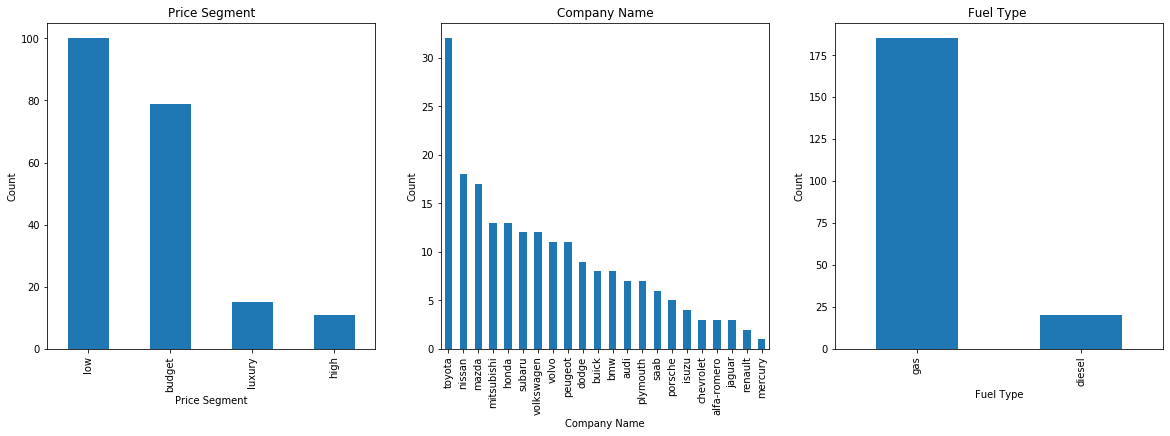

In [132]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = CarPrice.priceseg.value_counts().plot(kind = 'bar')
plt.title('Price Segment')
plt1.set(xlabel = 'Price Segment', ylabel='Count')

plt.subplot(1,3,2)
plt1 = CarPrice.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Company Name')
plt1.set(xlabel = 'Company Name', ylabel='Count')

plt.subplot(1,3,3)
plt1 = CarPrice.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type ')
plt1.set(xlabel = 'Fuel Type', ylabel='Count')

plt.show()

Inferences-
- Most of the cars are in low price segment
- Toyota has maximum number of cars in the market
- Most of the cars are running on gas

####  ###Analyzing columns door number, aspiration and car body

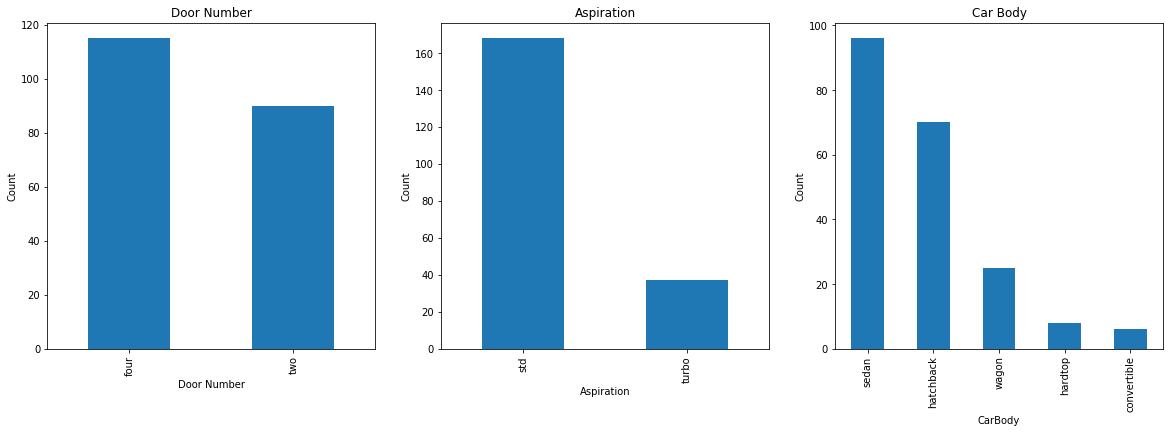

In [133]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = CarPrice.doornumber.value_counts().plot(kind = 'bar')
plt.title('Door Number')
plt1.set(xlabel = 'Door Number', ylabel='Count')

plt.subplot(1,3,2)
plt1 = CarPrice.aspiration.value_counts().plot(kind = 'bar')
plt.title('Aspiration')
plt1.set(xlabel = 'Aspiration', ylabel='Count')

plt.subplot(1,3,3)
plt1 = CarPrice.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Body')
plt1.set(xlabel = 'CarBody', ylabel='Count')

plt.show()

Inferences-
- Cars with four doors is more than two doors
- Most of the cars have std aspiration
- Sedan and Hatchback are most popular car bodies

####  ###Analyzing columns drivewheel, enginelocation, cylindernumber

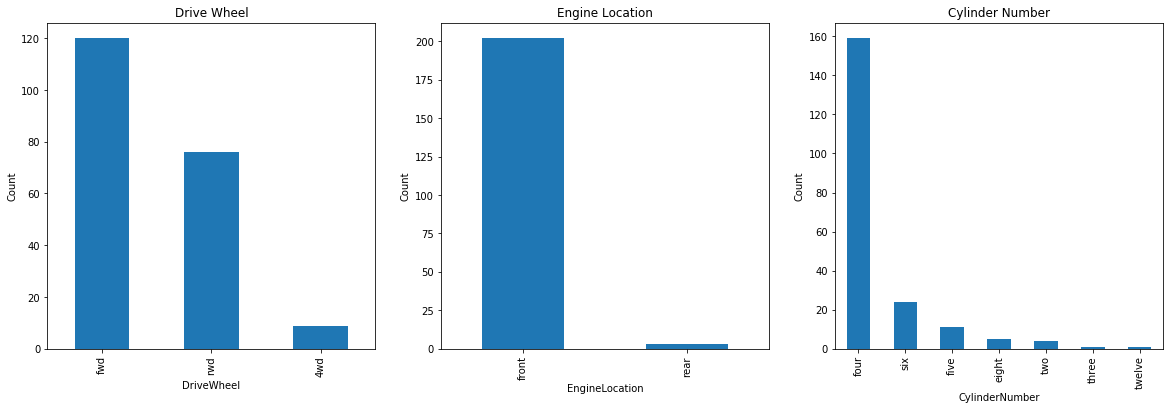

In [134]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = CarPrice.drivewheel.value_counts().plot(kind = 'bar')
plt.title('Drive Wheel')
plt1.set(xlabel = 'DriveWheel', ylabel='Count')

plt.subplot(1,3,2)
plt1 = CarPrice.enginelocation.value_counts().plot(kind = 'bar')
plt.title('Engine Location')
plt1.set(xlabel = 'EngineLocation', ylabel='Count')

plt.subplot(1,3,3)
plt1 = CarPrice.cylindernumber.value_counts().plot(kind = 'bar')
plt.title('Cylinder Number')
plt1.set(xlabel = 'CylinderNumber', ylabel='Count')


plt.show()

Inferences-
- Most of the cars have forward drive wheel
- Most of the cars have front engine location
- Most of the cars have four cylinders

#### ### Analyzing Fuel system and risk rate

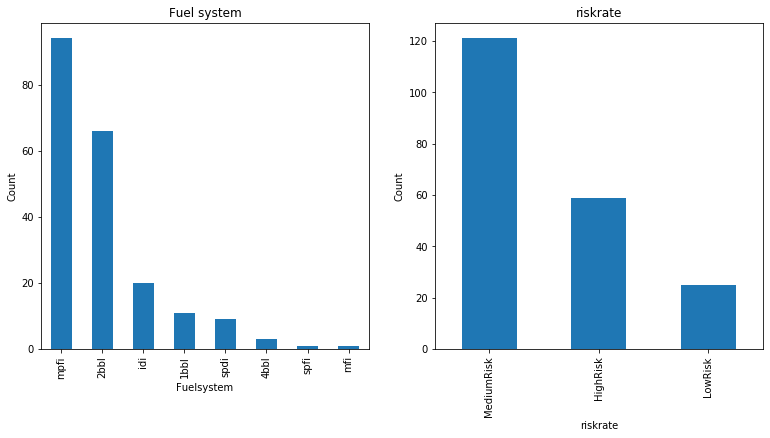

In [135]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = CarPrice.fuelsystem.value_counts().plot(kind = 'bar')
plt.title('Fuel system')
plt1.set(xlabel = 'Fuelsystem', ylabel='Count')

plt.subplot(1,3,2)
plt1 = CarPrice.riskrate.value_counts().plot(kind = 'bar')
plt.title('riskrate')
plt1.set(xlabel = 'riskrate', ylabel='Count')


plt.show()


Inference- 
- Most of the cars have mpfi fuel system
- Most of the cars sold has medium risk

# 2. On Nuemerical Variables

### Box Plots

#### ### Analyzing wheelbase, enginesize,boreratio		
	


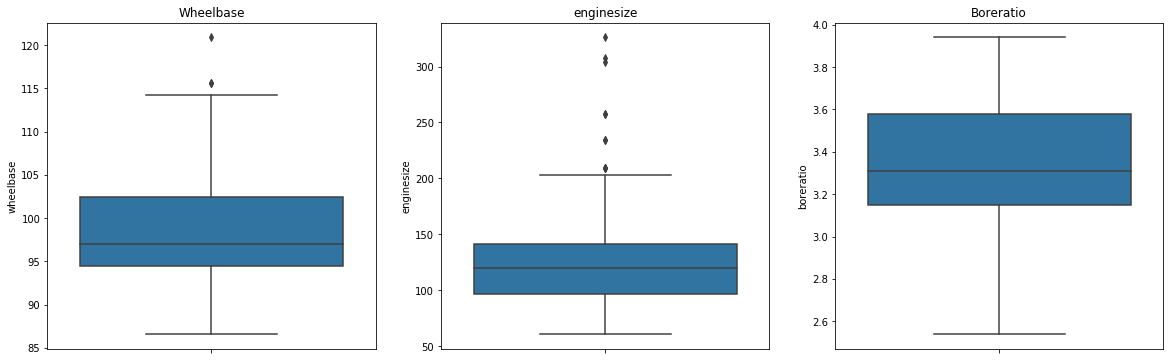

In [136]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt.title('Wheelbase')
sns.boxplot(x=CarPrice.wheelbase,orient='v')

plt.subplot(1,3,2)
plt.title('enginesize')
sns.boxplot(x=CarPrice.enginesize,orient='v')

plt.subplot(1,3,3)
plt.title('Boreratio')
sns.boxplot(x=CarPrice.boreratio,orient='v')

plt.show()

Inference- 
- Median of the wheel base is between 95 to 100
- Median of enginesize is between 100 to 140
- Median of boreratio is 3.2 to 3.4
- There are outliers in Wheelase and enginesize


#### ### Analyzing car length, car widht,  car height, curb weight

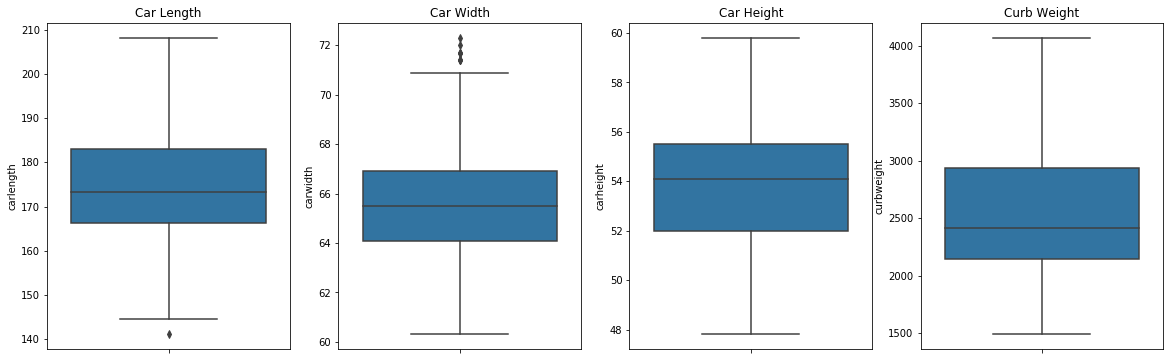

In [137]:
plt.figure(figsize=(20, 6))

plt.subplot(1,4,1)
plt.title('Car Length')
sns.boxplot(x=CarPrice.carlength,orient='v')

plt.subplot(1,4,2)
plt.title('Car Width')
sns.boxplot(x=CarPrice.carwidth,orient='v')

plt.subplot(1,4,3)
plt.title('Car Height')
sns.boxplot(x=CarPrice.carheight,orient='v')

plt.subplot(1,4,4)
plt.title('Curb Weight')
sns.boxplot(x=CarPrice.curbweight,orient='v')

plt.show()

Inferences-
- Median of car length is between 170 to 180
- Median of car width is between 64 to 67
- Median of car height is between 52 to 55
- Median of curb weight is between 2000 to 2500

#### ### Analyzing stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg		


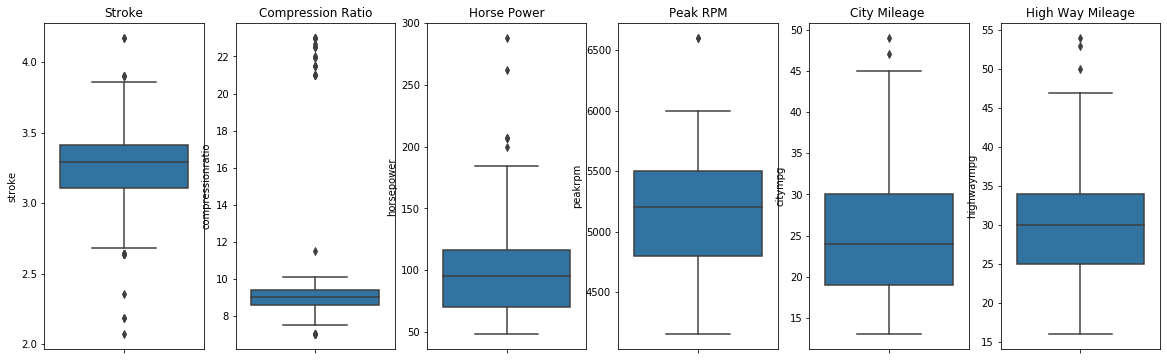

In [138]:
plt.figure(figsize=(20, 6))

plt.subplot(1,6,1)
plt.title('Stroke')
sns.boxplot(x=CarPrice.stroke,orient='v')

plt.subplot(1,6,2)
plt.title('Compression Ratio')
sns.boxplot(x=CarPrice.compressionratio,orient='v')

plt.subplot(1,6,3)
plt.title('Horse Power')
sns.boxplot(x=CarPrice.horsepower,orient='v')

plt.subplot(1,6,4)
plt.title('Peak RPM')
sns.boxplot(x=CarPrice.peakrpm,orient='v')

plt.subplot(1,6,5)
plt.title('City Mileage ')
sns.boxplot(x=CarPrice.citympg,orient='v')

plt.subplot(1,6,6)
plt.title('High Way Mileage')
sns.boxplot(x=CarPrice.highwaympg,orient='v')

plt.show()

Inferences-
- All variables have outliers
- HorsePower of most of the cars is around 100
- Most car have peak RPM between 4800 to 5500
- Highway mileage is more than city mileage

### Scatter plots - finding linear relationship

#### ### Price vs Car height, Car Length ,Car Width and curb weight

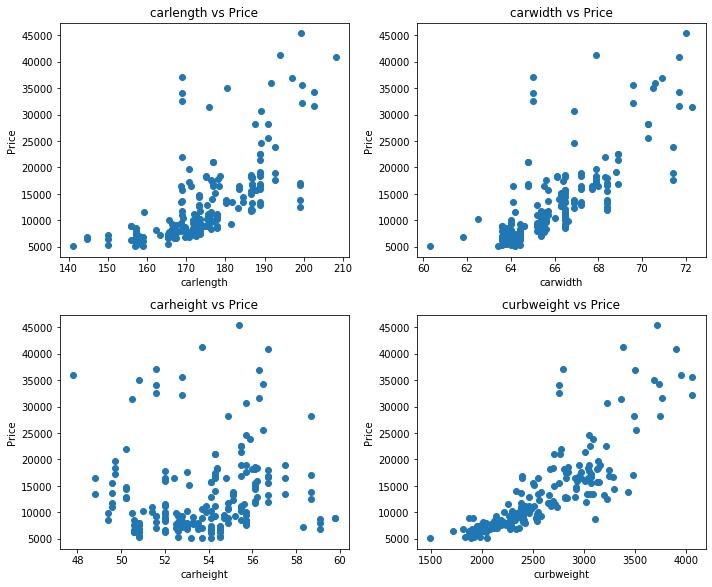

In [139]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(CarPrice[x],CarPrice['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
plt.tight_layout()

Inferences-

     -Car Lenght, Car Width, Curb weight show linear relation ship with Price. They have impact on the price
    -Car height dont show any linear relationship. Seems it does not have any impact on Car price

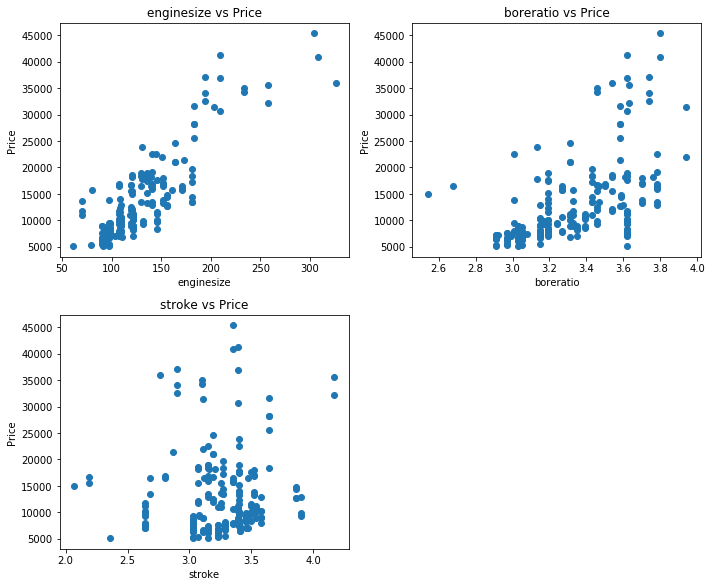

In [140]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(CarPrice[x],CarPrice['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('enginesize', 1)
scatter('boreratio', 2)
scatter('stroke', 3)

plt.tight_layout()

Inferences-
- engine size and bore ratio show linear relation ship with Price. They have impact on the price
- stroke dont show any linear relationship. Seems it does not have any impact on Car price

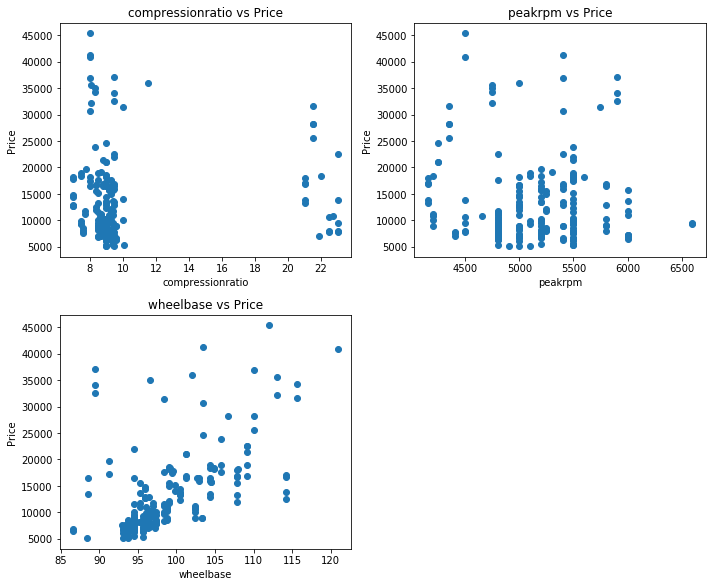

In [141]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(CarPrice[x],CarPrice['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('compressionratio', 1)
scatter('peakrpm', 2)
scatter('wheelbase', 3)

plt.tight_layout()

Inference-
- Wheel base show linear relation ship with Price. 
- Conpression ration and peak rpm dont show any linear relation with Price

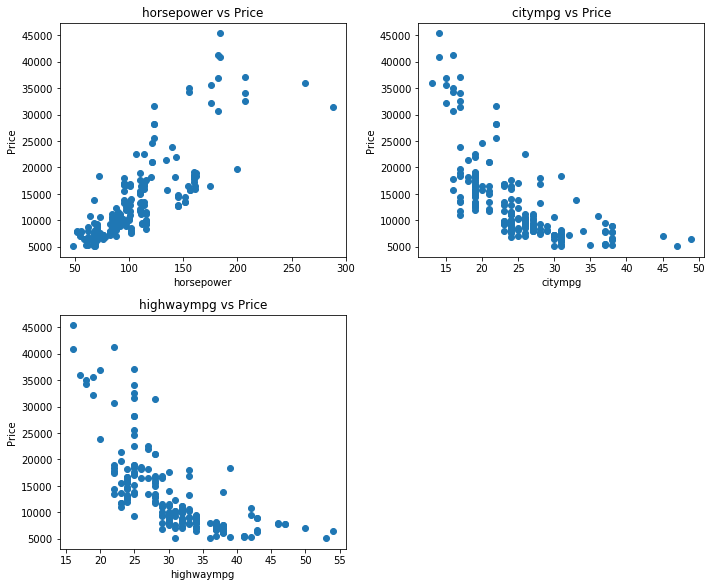

In [142]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(CarPrice[x],CarPrice['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('horsepower', 1)
scatter('citympg', 2)
scatter('highwaympg', 3)

plt.tight_layout()

Inference
- Horsepower(+ve), and city and high way mileage(-ve) show linear relationship with price

### ### Deriving new variables

In [143]:
# Creating a new variable called mileage based on weighted average of citympg and highwaympg
CarPrice['mileage'] = CarPrice['citympg']*0.55 + CarPrice['highwaympg']*0.45

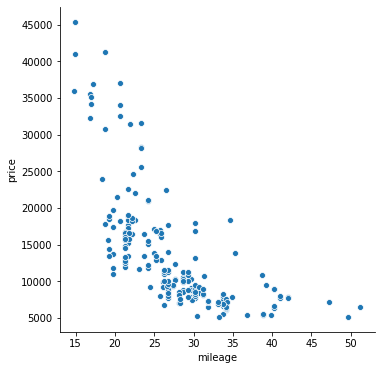

In [144]:
# Scatter plot for mileage
sns.pairplot(CarPrice, x_vars='mileage', y_vars='price',size=5, aspect=1, kind='scatter')
plt.show()

Inference-
- Mileage show linear relationship(-ve) with respect to Price

In [145]:
#Binning the Car Companies based on avg prices of each Company.
CarPrice['price'] = CarPrice['price'].astype('int')
temp = CarPrice.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
CarPrice_bin=['Budget','Medium','Highend']
CarPrice['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=CarPrice_bin)
CarPrice.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,priceseg,riskrate,mileage,carsrange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495,budget,HighRisk,23.70,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500,budget,HighRisk,23.70,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500,budget,MediumRisk,22.15,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950,budget,HighRisk,26.70,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450,budget,HighRisk,19.80,Medium


## Bivariate Analysis

#### Mileage vs Car Price vs drivewheel

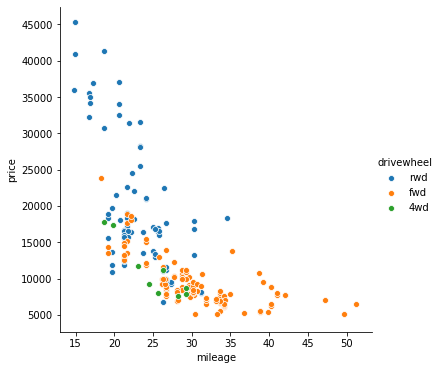

In [146]:
sns.pairplot(CarPrice, x_vars='mileage', y_vars='price',hue = 'drivewheel',size=5, aspect=1, kind='scatter')
plt.show()

Inference-
- Mileage is -ve correlated to car price for all kinds of drive wheel

#### Mileage vs price vs fueltype 

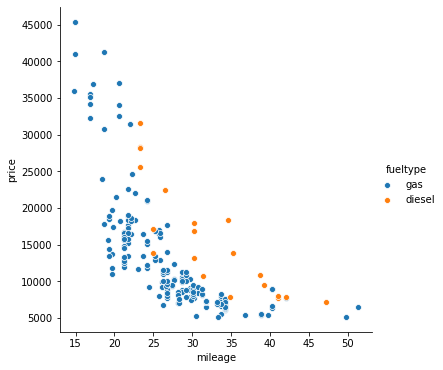

In [147]:
sns.pairplot(CarPrice, x_vars='mileage', y_vars='price',hue = 'fueltype',size=5, aspect=1, kind='scatter')
plt.show()

Inference-
- Mileage is -ve corrlerated to price for all fueltypes

#### Car Range vs Average Price

<Figure size 1800x432 with 0 Axes>

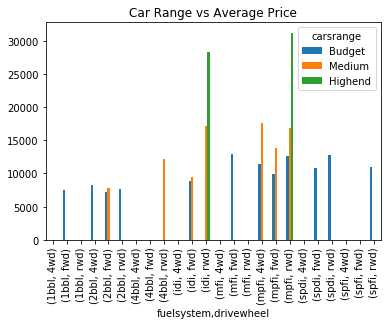

In [148]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(CarPrice.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

In [149]:
CarPrice.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,priceseg,riskrate,mileage,carsrange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495,budget,HighRisk,23.70,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500,budget,HighRisk,23.70,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500,budget,MediumRisk,22.15,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950,budget,HighRisk,26.70,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450,budget,HighRisk,19.80,Medium


Inference
-High end cars prefer rear wheel drive(rwd)

After doing Multivariate and Bivariate analysis, following variables are of significance for linear regression model building
- carsrange(Categorical) 
- mileage(nuemeric)
- carlength(nuemeric)
- carwidth(nuemeric)
- curbweight(nuemeric)	
- enginesize(nuemeric)		
- boreratio(nuemeric)	
- wheelbase(nuemeric)		
- horsepower(nuemeric)		
- enginetype(Categorical) 
- enginesize(nuemeric)
- carbody(Categorical) 
- Aspiration(Categorical) 
- cylindernumber(Categorical) 
- fueltype(Categorical) 

# Step 3: Preparing data for modeling

In [150]:
# dataframe based on significant variables

CarPrice_sv= CarPrice[['carsrange', 'enginetype','carbody', 'aspiration','cylindernumber', 'fueltype',
                      'mileage','carlength','carwidth','curbweight','enginesize','boreratio','wheelbase',
                      'horsepower','enginesize', 'price']]
CarPrice_sv.head()

,carsrange,enginetype,carbody,aspiration,cylindernumber,fueltype,mileage,carlength,carwidth,curbweight,enginesize,boreratio,wheelbase,horsepower,enginesize,price
0,Medium,dohc,convertible,std,four,gas,23.70,168.8,64.1,2548,130,3.47,88.6,111,130,13495
1,Medium,dohc,convertible,std,four,gas,23.70,168.8,64.1,2548,130,3.47,88.6,111,130,16500
2,Medium,ohcv,hatchback,std,six,gas,22.15,171.2,65.5,2823,152,2.68,94.5,154,152,16500
3,Medium,ohc,sedan,std,four,gas,26.70,176.6,66.2,2337,109,3.19,99.8,102,109,13950
4,Medium,ohc,sedan,std,five,gas,19.80,176.6,66.4,2824,136,3.19,99.4,115,136,17450


# Encoding:
    -Converting binary vars to 1/0
    -Others categorical vars to dummy vars

In [151]:
#1 - Categorrical variable to binary
CarPrice_sv.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [152]:
CarPrice_sv['fueltype']=CarPrice_sv['fueltype'].map({'gas':1,'diesel':0})
CarPrice_sv['fueltype'].head()

0    1
1    1
2    1
3    1
4    1
Name: fueltype, dtype: int64

In [153]:
#2 - Categorrical variable to binary
CarPrice_sv.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [154]:
CarPrice_sv['aspiration']=CarPrice_sv['aspiration'].map({'std':1,'turbo':0})
CarPrice_sv['aspiration'].head()

0    1
1    1
2    1
3    1
4    1
Name: aspiration, dtype: int64

In [155]:
CarPrice_sv.head()

,carsrange,enginetype,carbody,aspiration,cylindernumber,fueltype,mileage,carlength,carwidth,curbweight,enginesize,boreratio,wheelbase,horsepower,enginesize,price
0,Medium,dohc,convertible,1,four,1,23.70,168.8,64.1,2548,130,3.47,88.6,111,130,13495
1,Medium,dohc,convertible,1,four,1,23.70,168.8,64.1,2548,130,3.47,88.6,111,130,16500
2,Medium,ohcv,hatchback,1,six,1,22.15,171.2,65.5,2823,152,2.68,94.5,154,152,16500
3,Medium,ohc,sedan,1,four,1,26.70,176.6,66.2,2337,109,3.19,99.8,102,109,13950
4,Medium,ohc,sedan,1,five,1,19.80,176.6,66.4,2824,136,3.19,99.4,115,136,17450


# Creating Dummy Variables

In [156]:
#1 creating dummy vars for carbody
carbody_d = pd.get_dummies(CarPrice_sv ['carbody'], drop_first=True)
carbody_d.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [157]:
#2 creating dummy vars for engine type
enginetype_d = pd.get_dummies(CarPrice_sv['enginetype'], drop_first=True)
enginetype_d.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [158]:
#3 creating dummy vars for cylindernumber
cylindernumber_d = pd.get_dummies(CarPrice_sv['cylindernumber'], drop_first=True)
cylindernumber_d.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [159]:
#4 creating dummy vars for fuelsystem
carsrange_d = pd.get_dummies(CarPrice_sv ['carsrange'], drop_first=True)
carsrange_d.head()

,Medium,Highend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [160]:
# Dropping variables for which dummay has been created

CarPrice_sv = CarPrice_sv.drop(['carbody','enginetype', 'cylindernumber', 'carsrange'], axis =1)

In [161]:
# concat the dummy variables  with the orginale df
CarPrice_sv= pd.concat([CarPrice_sv, carbody_d, enginetype_d, cylindernumber_d, carsrange_d], axis =1)
CarPrice_sv.head()

,aspiration,fueltype,mileage,carlength,carwidth,curbweight,enginesize,boreratio,wheelbase,horsepower,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,1,1,23.70,168.8,64.1,2548,130,3.47,88.6,111,...,0,0,0,1,0,0,0,0,1,0
1,1,1,23.70,168.8,64.1,2548,130,3.47,88.6,111,...,0,0,0,1,0,0,0,0,1,0
2,1,1,22.15,171.2,65.5,2823,152,2.68,94.5,154,...,1,0,0,0,1,0,0,0,1,0
3,1,1,26.70,176.6,66.2,2337,109,3.19,99.8,102,...,0,0,0,1,0,0,0,0,1,0
4,1,1,19.80,176.6,66.4,2824,136,3.19,99.4,115,...,0,0,1,0,0,0,0,0,1,0


### Splitting into train and test

In [162]:
df_train, df_test = train_test_split(CarPrice_sv, train_size =0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 30)
(62, 30)


In [163]:
# 1. Instantiate  an object
scaler = MinMaxScaler()

# create a list of nuemeric variables
num_vars = ['mileage','carlength','carwidth','curbweight','enginesize','boreratio','wheelbase',
                      'horsepower','enginesize', 'price']

# fit on the data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,aspiration,fueltype,mileage,carlength,carwidth,curbweight,enginesize,boreratio,wheelbase,horsepower,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,1,1,0.530864,0.426016,0.291667,0.272692,0.139623,0.230159,0.244828,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,1,1,0.213992,0.452033,0.666667,0.500388,0.339623,1.000000,0.272414,0.395833,...,0,0,0,1,0,0,0,0,0,1
166,1,1,0.344307,0.448780,0.308333,0.314973,0.139623,0.444444,0.272414,0.266667,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0.244170,0.450407,0.316667,0.411171,0.260377,0.626984,0.068966,0.262500,...,0,0,0,1,0,0,0,0,1,0
199,0,1,0.122085,0.775610,0.575000,0.647401,0.260377,0.746032,0.610345,0.475000,...,0,0,0,1,0,0,0,0,1,0


# Step 4: Train the model

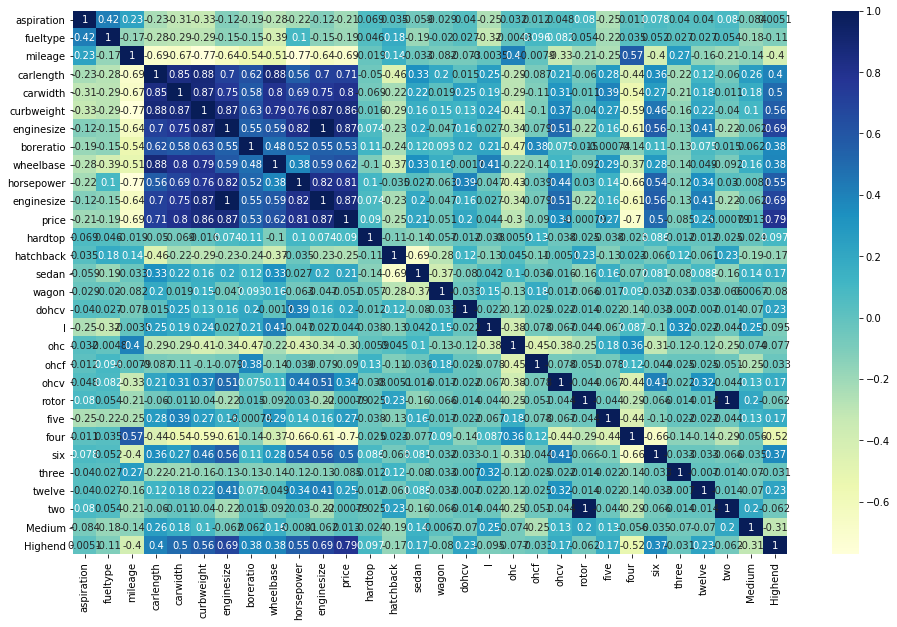

In [164]:
# heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap ='YlGnBu')
plt.show()

# Dividing into X and Y sets for the model building

In [165]:
y_train = df_train.pop('price')
X_train = df_train

In [166]:
X_train.head()

,aspiration,fueltype,mileage,carlength,carwidth,curbweight,enginesize,boreratio,wheelbase,horsepower,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,1,1,0.530864,0.426016,0.291667,0.272692,0.139623,0.230159,0.244828,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,1,1,0.213992,0.452033,0.666667,0.500388,0.339623,1.000000,0.272414,0.395833,...,0,0,0,1,0,0,0,0,0,1
166,1,1,0.344307,0.448780,0.308333,0.314973,0.139623,0.444444,0.272414,0.266667,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0.244170,0.450407,0.316667,0.411171,0.260377,0.626984,0.068966,0.262500,...,0,0,0,1,0,0,0,0,1,0
199,0,1,0.122085,0.775610,0.575000,0.647401,0.260377,0.746032,0.610345,0.475000,...,0,0,0,1,0,0,0,0,1,0


# RFE

In [167]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [168]:
# Running RFE with the output number of the variable equal to 40
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [169]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('aspiration', False, 19),
 ('fueltype', False, 17),
 ('mileage', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('wheelbase', False, 3),
 ('horsepower', True, 1),
 ('enginesize', False, 15),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohcv', True, 1),
 ('l', False, 20),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 14),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 18),
 ('twelve', True, 1),
 ('two', False, 16),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [170]:
col = X_train.columns[rfe.support_]
col

Index(['mileage', 'carwidth', 'curbweight', 'horsepower', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [171]:
X_train.columns[~rfe.support_]

Index(['aspiration', 'fueltype', 'carlength', 'enginesize', 'boreratio',
       'wheelbase', 'enginesize', 'hardtop', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'two', 'Medium'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

### Model 1


In [172]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [173]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [174]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [175]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.29e-70
Time:                        16:39:44   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

### Model 2

In [176]:
# Dropping twelve because of high p value
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.25e-71
Time:                        16:39:44   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0764      0.041     -1.851      0.066      -0.158       0.005
mileage        0.0736      0.051      1.435      0.154      -0.028       0.175
carwidth       0.2580      0.062      4.137      0.000       0.135       0.381
curbweight     0.2756      0.069      3.995      0.000       0.139       0.412
horsepower     0.3997      0.069      5.824      0.000       0.264       0.535
hatchback     -0.0951      0.025     -3.766      0.000      -0.145      -0.045
sedan         -0.0744      0.025     -2.983      0.003      -0.124      -0.025
wagon         -0.1050      0.028     -3.744      0.000      -0.160      -0.050
dohcv         -0.2319      0.077     -3.015      0.003      -0.384      -0.080
Highend        0.2565      0.020     12.743      0.000       0.217       0.296
==============================================================================
Omnibus:                       48.027   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.802
Skew:                           1.231   Prob(JB):                     1.99e-35
Kurtosis:                       7.556   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3

In [177]:
# Dropping mileage because of high p value
X_train_new = X_train_new.drop(['mileage'], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           7.85e-72
Time:                        16:39:44   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.246      -0.082       0.021
carwidth       0.2488      0.062      3.995      0.000       0.126       0.372
curbweight     0.2593      0.068      3.796      0.000       0.124       0.394
horsepower     0.3469      0.058      5.964      0.000       0.232       0.462
hatchback     -0.0922      0.025     -3.650      0.000      -0.142      -0.042
sedan         -0.0711      0.025     -2.850      0.005      -0.120      -0.022
wagon         -0.1047      0.028     -3.721      0.000      -0.160      -0.049
dohcv         -0.1968      0.073     -2.689      0.008      -0.342      -0.052
Highend        0.2610      0.020     13.083      0.000       0.222       0.301
==============================================================================
Omnibus:                       48.637   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.444
Skew:                           1.250   Prob(JB):                     8.77e-36
Kurtosis:                       7.566   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.90
2,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


### Model 4

In [179]:
# Drop Curbweight as its VIF is high
X_train_new = X_train_new.drop(['curbweight'], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.70e-70
Time:                        16:39:44   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.248      -0.086       0.022
carwidth       0.4269      0.043      9.944      0.000       0.342       0.512
horsepower     0.4690      0.051      9.228      0.000       0.368       0.569
hatchback     -0.1044      0.026     -3.976      0.000      -0.156      -0.052
sedan         -0.0756      0.026     -2.896      0.004      -0.127      -0.024
wagon         -0.0865      0.029     -2.974      0.003      -0.144      -0.029
dohcv         -0.3106      0.070     -4.435      0.000      -0.449      -0.172
Highend        0.2772      0.020     13.559      0.000       0.237       0.318
==============================================================================
Omnibus:                       43.937   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.746
Skew:                           1.171   Prob(JB):                     1.82e-28
Kurtosis:                       6.995   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


### Model 5

In [181]:
# Drop sedan as its VIF is high
X_train_new = X_train_new.drop(['sedan'], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.68e-69
Time:                        16:39:45   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.000      -0.129      -0.058
carwidth       0.3963      0.043      9.275      0.000       0.312       0.481
horsepower     0.5001      0.051      9.805      0.000       0.399       0.601
hatchback     -0.0373      0.013     -2.938      0.004      -0.062      -0.012
wagon         -0.0170      0.017     -1.008      0.315      -0.050       0.016
dohcv         -0.3203      0.072     -4.460      0.000      -0.462      -0.178
Highend        0.2808      0.021     13.402      0.000       0.239       0.322
==============================================================================
Omnibus:                       34.143   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.788
Skew:                           1.018   Prob(JB):                     1.56e-16
Kurtosis:                       5.841   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.82
2,horsepower,2.39
1,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


### Model 6

In [183]:
# Drop wagon as its p valus is high
X_train_new = X_train_new.drop(['wagon'], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.57e-70
Time:                        16:39:45   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.000      -0.132      -0.062
carwidth       0.3952      0.043      9.252      0.000       0.311       0.480
horsepower     0.5013      0.051      9.832      0.000       0.401       0.602
hatchback     -0.0336      0.012     -2.764      0.006      -0.058      -0.010
dohcv         -0.3231      0.072     -4.502      0.000      -0.465      -0.181
Highend        0.2833      0.021     13.615      0.000       0.242       0.324
==============================================================================
Omnibus:                       36.097   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.717
Skew:                           1.067   Prob(JB):                     8.07e-18
Kurtosis:                       5.943   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


### Model 7

In [185]:
# Drop dohcv as its p valus is high
X_train_new = X_train_new.drop(['dohcv'], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.04e-67
Time:                        16:39:45   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.000      -0.119      -0.046
carwidth       0.3957      0.046      8.677      0.000       0.306       0.486
horsepower     0.4402      0.052      8.390      0.000       0.336       0.544
hatchback     -0.0414      0.013     -3.219      0.002      -0.067      -0.016
Highend        0.2794      0.022     12.591      0.000       0.236       0.323
==============================================================================
Omnibus:                       29.385   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.010
Skew:                           0.692   Prob(JB):                     5.22e-22
Kurtosis:                       6.812   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


There is no significant chnage in R square or Adjusted R square. This means that dohcv also dont have much impact. Final variables horsepower, carwidht, highend, hathcback 

### # Residual analysis of train data

In [187]:
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

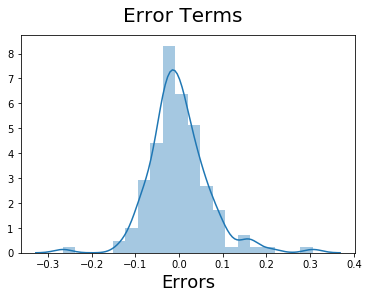

In [188]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are normally distributed with mean zero. So the assumptions onlinear modelling is satisfied

# Step 5: Making Predictions


In [189]:
num_vars = ['mileage','carlength','carwidth','curbweight','enginesize','boreratio','wheelbase',
                      'horsepower','enginesize', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [190]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [191]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [192]:
# Making predictions
y_pred = lm.predict(X_test_new)

Comparing y_test and y_pred

In [193]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022035

Good correlation exits

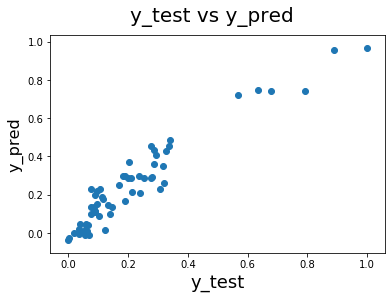

In [194]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

In [195]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.04e-67
Time:                        16:39:45   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

Conclusion- 
1) R square and Adjusted R square are close within 90% variance. So model is good.
2) F -Stats= 308 and Prob(F-Stats) =1.04e-67, this explains that overall model is good fit
3) P value of all the coeff is close to zero.
4) Price is dependent on carwidth, horsepower, carbody(hatchback) and Carsrange(highend)

Model is
- price = 0.3957 * carwidht+ 0.4402 * horsepower - 0.0414* hatchback + 0.2794 * Highend